# Final Report

DS 5001 Spring 2023 Final Project

Rachel Grace Treene

rg5xm@virginia.edu

## Introduction

The corpus used for this project is the seven Harry Potter books written by J.K. Rowling. It has 1,118,267 tokens and 23,096 unique terms. The books in the corpus tell the story of Harry Potter and his adventures, culminating in an epic battle between himself and Voldemort, the evil wizard.

In this project, I consider what Quidditch, the main sport played by people in the wizarding world, can tell us about the structure and similarity of the books to one another. When considering similarity between books, can we trace any patterns relating to the subject of Quidditch that might mirror book similarity? My investigation has three parts: first, I ask what we can learn about the correlation between the books in the Harry Potter series. Second, I ask what patterns we can find showing the prevalence of Quidditch throughout the books. Third, I consider what similarities exist between patterns of book correlation and patterns of the prevalence and inclusion of Quidditch throughout the series.

## Source Data

The data comes from text files, obtained from a GitHub repository which used the Harry Potter corpus for an NLP project.

#### Provenance

The original text files are located at the following repository: https://github.com/ErikaJacobs/Harry-Potter-Text-Mining. A few errors were located after downloading which were fixed to ensure more accurate work could be done.

#### Location

The slightly edited source files for this project have been added to the current GitHub repository and can be found in the data directory. The link to that directory is as follows: https://github.com/rachelgracetreene/text-analytics-final-project/tree/main/data.

#### Description

The subject matter of the corpus is the fictional accounts of Harry Potter, a boy who is a wizard in England in the 1990s. The source files are structured in lines, where a line is an observation, and the average document length in terms of lines is 15744.57 lines. The average document length in terms of tokens is 189055.14 tokens.

#### Format

The source files are TXT files. The data in the files is plaintext.

#### Data Model

We processed and annotated the corpus and converted it into the standard text analytic data model (F2) format. The main challenge during the processing was defining the correct regular expression to select chapters; this was made difficult since the chapter titles were in all caps, but some text within chapters was also capitalized. We defined a method to chunk the books by chapter without selecting extraneous text as chapter headers. Our OHCO included book number, chapter number, paragraph number, sentence number, and token number. Processing, annotating, and analyzing the corpus produced tables with features that are described in the data_model Jupyter notebook (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/data_model.ipynb).

All of the methods used to perform processing, annotating the VOCAB table, LDA, Word2Vec, Sentiment Analysis, and Semantic Search are in a custom Python package called HarryPotterETA (https://github.com/rachelgracetreene/text-analytics-final-project/blob/main/HarryPotterETA.py).

## Exploration

First, I converted each book to F2 format. Then I combined each book into one corpus, from which I extracted a vocabulary. I added part of speech, stopwords, and stems to the vocabulary, and calculated term frequency inverse document frequency (TFIDF) and document frequency inverse document frequency (DFIDF).

With the corpus, I generated KDE plots showing the occurrence of the word Quidditch across all seven books, as well as the occurrence of Quidditch-related words like 'seeker', 'beater', 'chaser', 'keeper', 'snitch', and 'broomstick.' The plots are below.

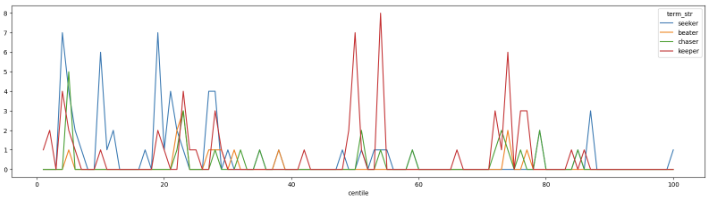

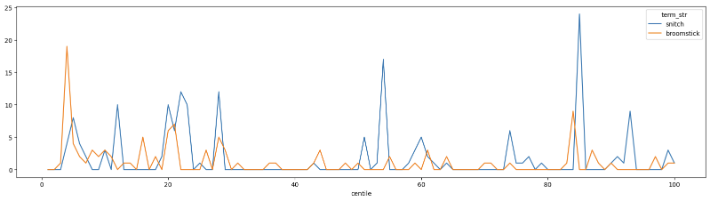

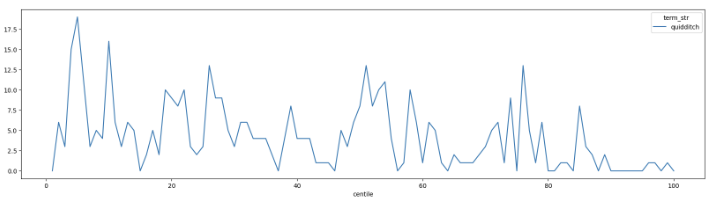

When comparing the KDE of the positions in Quidditch,'Keeper' and 'Seeker' are clearly more prevalent terms than 'Chaser' and 'Beater.' 'Keeper' and 'Seeker' occur more often by comparison. 'Broomstick' has a more random occurrence, while 'Snitch' has a few peaks that become more significant throughout the series. 
Quidditch is repeated regularly throughout the series, with the most incidence in the beginning and the least at the end.

To compare book similarity, I normalized TFIDF grouped by book and created a table called PAIRS that calculates book similarities with various metrics. I also created a correlation matrix of the books using the Kendall rank and edited the matrix to be a heatmap. It is shown below.


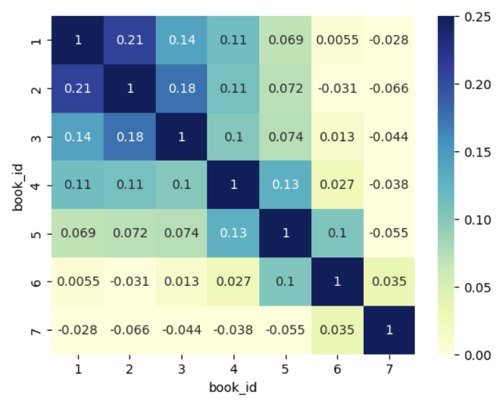

In [1]:
import base64, io, IPython
from PIL import Image as PILImage

image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/kendall-heatmap.png')

width, height = image.size
new_width = 500
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

From the graph above, it is clear that books 1, 2, and 3, have strongest correlation with one another. Book 4 appears to be about equally correlated with books 1, 2, and 3. Books 5, 6, and 7 are most correlated with the previous book - that is, book 5 is most correlated with book 4, book 6 is most correlated with book 5, and book 7 is most correlated with book 6. The strength of correlation also decreases as the series continues. 

Using mean TFIDF, I generated a significance measurement for each chapter of the corpus and plotting the significance for each book. The observations for my research question is similar for all books, so I only show the significance plot for Book 1. It is below.


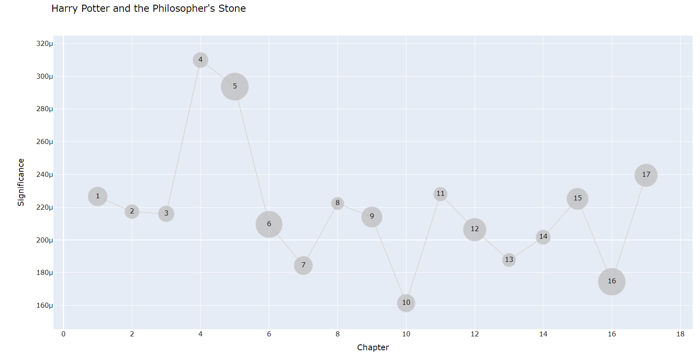

In [27]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/significance.png')

width, height = image.size
new_width = 700
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In book 1, the chapters containing a Quidditch match are chapters 11 and 13. In this plot, chapters 11 and 13 do not appear to be 'significant.' In fact, when plotting significance for each book, the same phenomenon is observed - all chapters with Quidditch matches are insignificant.

I conducted Principal Component Analysis (PCA) on the top 1000 terms by DFIDF, excluding proper nouns. I chose the top ten components and created a LOADINGS table to display the output. Below is a plot of components 9 and 3 plotted against each other by book and a plot showing the words in each component. The plots demonstrate an opposition between Quidditch and the classroom.


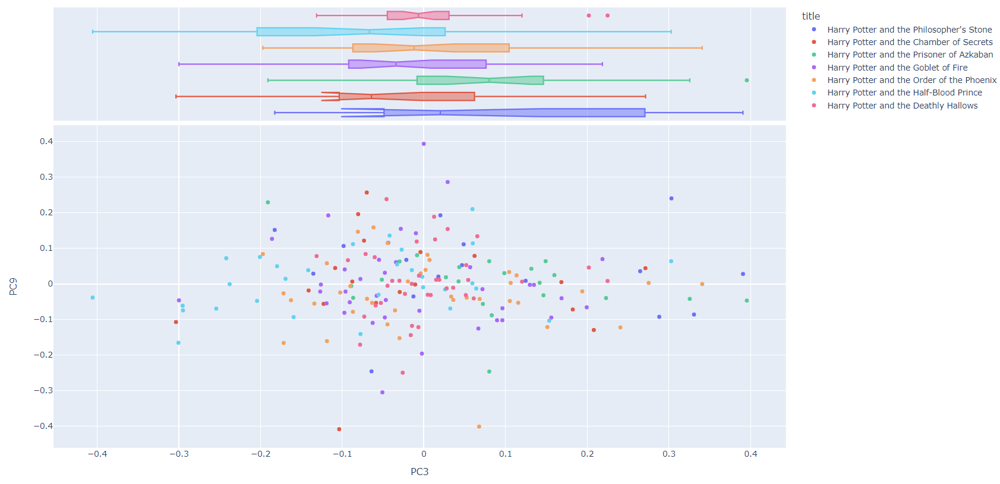

In [29]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/PCA-1.png')

width, height = image.size
new_width = 1000
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In the graph above, PC3 plotted against PC9 shows an opposition between Quidditch and the classroom. Based on the center measurements of the color-coded box and whisker plots, it is clear that the books 1 and 3 (*Harry Potter and the Philosopher's Stone* and *Harry Potter and the Prisoner of Azkaban*) are located on the 'Quidditch' side of the opposition.


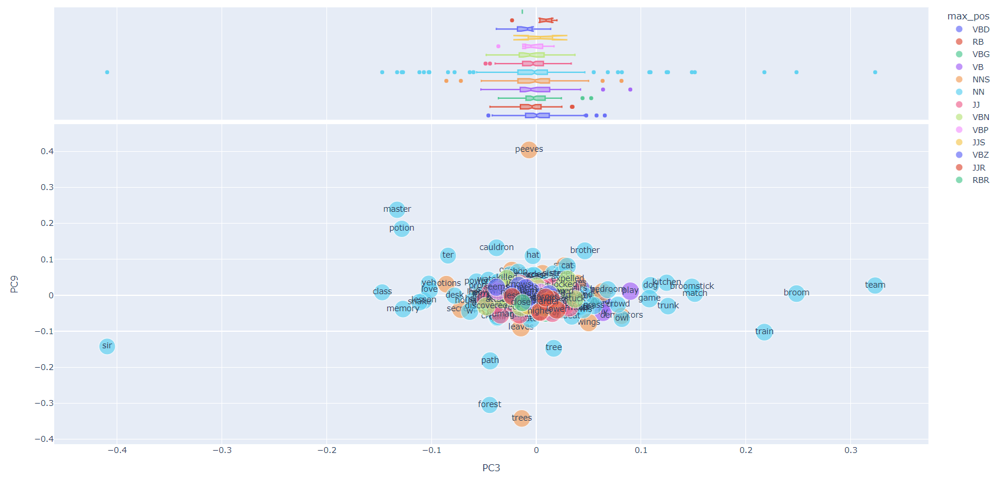

In [30]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/PCA-2.png')

width, height = image.size
new_width = 1000
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In the graph above, the words corresponding to the components are shown. It is clear that the words pertaining to QUidditch - 'team,' 'broom,' 'train', 'broomstick,' and 'match' are compared with 'sir,' 'class,' 'master,' 'potion,' and 'memory,' words that are associated with the classroom.

I conducted Latent Dirichlet Allocation (LDA) with a vector space. I used an ngram range of [1, 2] and chose 4000 features, with English stopwords. For LDA, I specified 20 topics, 20 components, 5 iteractions, and a learning offset of 5. I chose 7 terms per topic. Then I annotated the generated TOPICS manually with my own description of each topic. The annotated TOPICS table is below.


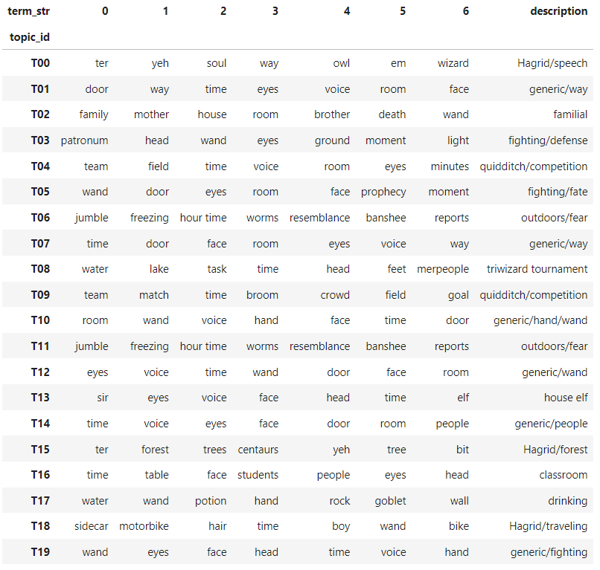

In [32]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/topics.png')

width, height = image.size
new_width = 600
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

Obviously, topics 4 and 9 pertain to Quidditch based on the words they contain. I generated a table to show, for each topic, which book most contained it. Below are the results.


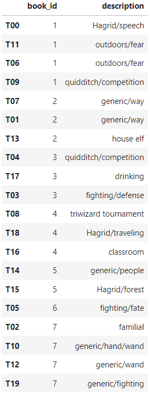

In [41]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/topic-top-books.png')

width, height = image.size
new_width = 150
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

Topic 9 is most prevalent in book 1, and Topic 4 is most prevalent in book 3.

Next I conducted Word 2 Vec on verbs and nouns, creating a model with a window of 2, a vector size of 256, and a minumum count of 80. For my tSNE table, I used a learning rate of 200, perplexity of 20, 2 components, a random initialization, and 1000 iterations. The resulting tSNE plot is below.


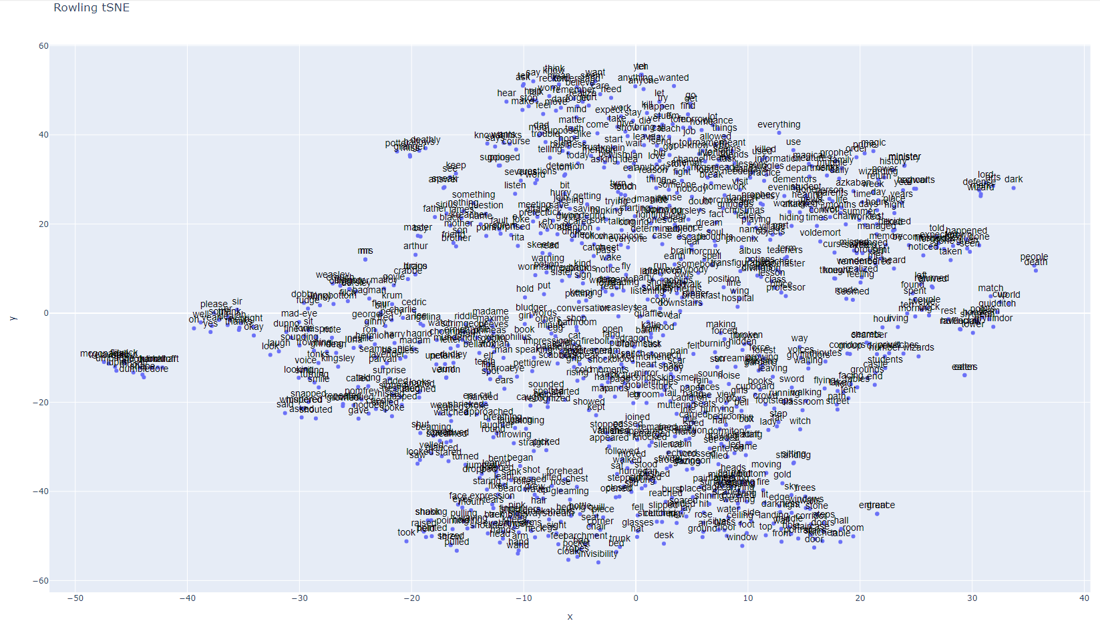

In [33]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/tSNE-big.png')

width, height = image.size
new_width = 1100
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

I edited the tSNE plot to show the cluster pertaining to Quidditch more closely, located around (0, -10). The plot is below.


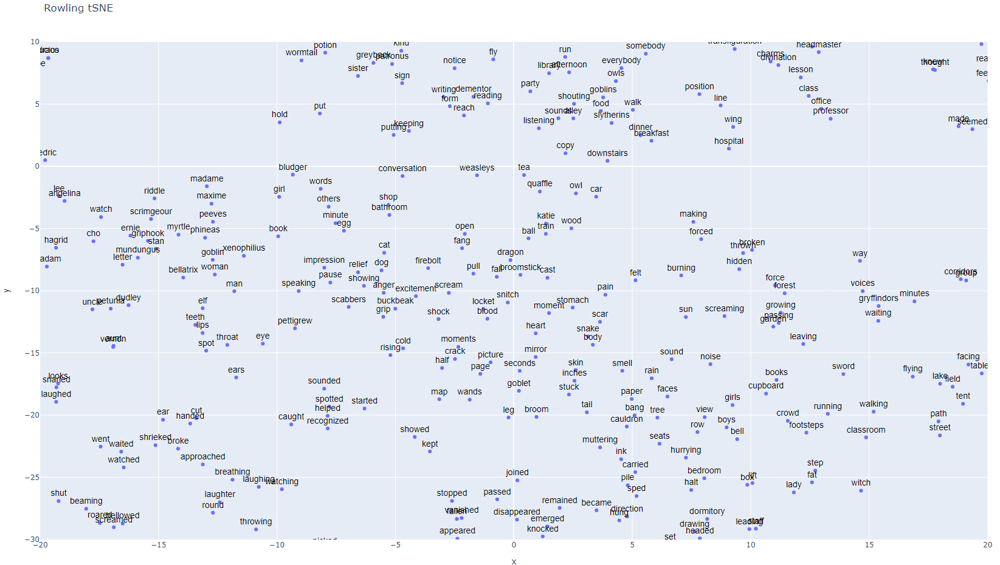

In [34]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/tSNE-small.png')

width, height = image.size
new_width = 1000
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

The words 'quaffle,' 'ball,' 'train,' broomstick,' 'snitch,' and 'fall' occur close together, with 'bludger' and 'broom' not far off.

We performed sentiment analysis with the sentiment analysis lexicon and plotted emotions for each book. I selected the chapters from each book in which a Quidditch match occurs and generated the emotions in those chapters as a heatmap for each book. Finally, I combined those rows of the heatmap. The plot is below.


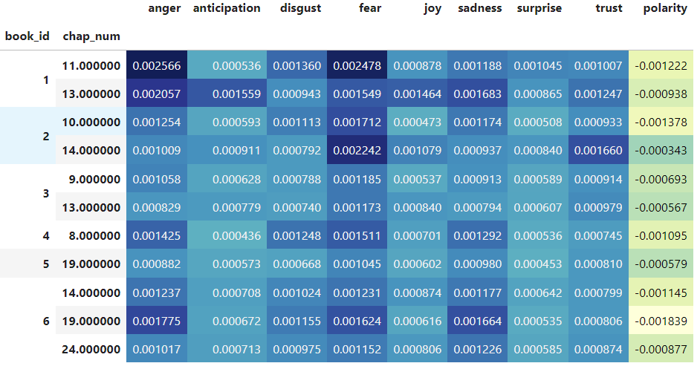

In [35]:
image = PILImage.open('C:/Users/Rachel/OneDrive/MSDS/Spring2023/DS5001/text-analytics-final-project/images/sentiments.png')

width, height = image.size
new_width = 700
new_height = int(height * (new_width / width))
resized_image = image.resize((new_width, new_height))

output = io.BytesIO()
resized_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

The predominant emotions felt throughout all chapters appear to be fear and anger.

Finally, we added code for a semantic search to the project. No visualization was produced that is helpful for this research question.

## Interpretation

These visualizations enable an exploration of book correlation and similarity. In particular, the heatmap showing the Kendall sum correlations indicates that books 1, 2, and 3 are most similar to one another, while books 4, 5, 6, and 7 are more different from the others.

The visualizations also enable an exploration of Quidditch occurrence and themes pertaining to the sport throughout the books. The KDE plot of the term 'quidditch' throughout the book suggests a fairly regular appearance of the word; however, it decreases in frequency as the series goes on, with the most prevalence noted in the earliest books. The lack of 'significance' for all chapters with Quidditch matches across the series indicates that Quidditch may occupy a similar role in all the books in which matches occur (notably, book 7 does not have any Quidditch matches). In addition, the heatmap showing emotions during each chapter with a Quidditch match indicates similarity in emotional theme for all matches for all books.

A few visualizations indicate that Quidditch may be a more dominant theme in the first few books of the series. First, the higher peaks of occurrence of 'quidditch' in the KDE plot align with the first two books in particular. Second, results from PCA show that books 1 and 3 skew more favorably toward the Quidditch 'side' of the opposition, compared with the classroom 'side.' Third, results from LDA show that the topics pertaining to Quidditch are most present in books 1 and 3, respectively.

Generally, it seems that the occurrence of Quidditch throughout the books does have some correlation with similarity of books to one another. My results indicate that books 1, 2, and 3 are most similar to one another, and Quidditch is most prevalent in these books based on several measures. Further exploration might expand on this interpretation, and could explore whether, on a book-by-book basis, any kind of narrative similarity in Quidditch matches could be found. I would also be interested in exploring whether the chapters with Quidditch matches play similar roles in the plots of their books. The significance measure used above is an experimental one, so I would hope to explore that differently.